# Part II - (Influence of Loan Variables on Loan Amount)
## by (Oluwatuyi Olawale)

## Investigation Overview
> The exploration examined the influence of customer loan variables on Loan Amount. Specifically, the analysis explores selected customers loan information on amount of loan recieved by the customer. The main variables of focus are: Credit Score Range (lower and upper)', LoanTerm, Borrower Rate and StatedMonthly Income. 

## Dataset Overview
> The dataset contains 113,937 loans with 81 variables on each loan. The needed variables were extracted from the dataset before exploration. The credit score column was also generated by averaging the credit score range (lower and upper). 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
my_data = pd.read_csv('prosperLoanData.csv')

In [3]:
#Needed data were extracted
#Creates a new DataFrame
my_data1 = my_data[['LoanOriginalAmount', 'BorrowerRate', 'StatedMonthlyIncome', 'Term', 'IncomeVerifiable', 
                    'CreditScoreRangeLower', 'CreditScoreRangeUpper']].copy()
my_data1 = my_data1.dropna()

In [23]:
#Creates a Credit Score from the Upper and Lower Limit by Calculating the Average 
my_data1['CreditScore']= (my_data1.CreditScoreRangeUpper + my_data1.CreditScoreRangeLower)/2
my_data1 = my_data1.astype({"CreditScore":'int64'})

### (Distribution of Loan Original Amount )
Loan Original Amount plotted on a log scale. It is multi-modal and slightly skewed to the right. The most common Original Loan amount occuring around 5000 dollars, while others occured at around 10,000 and slightly above 15000 dollars.


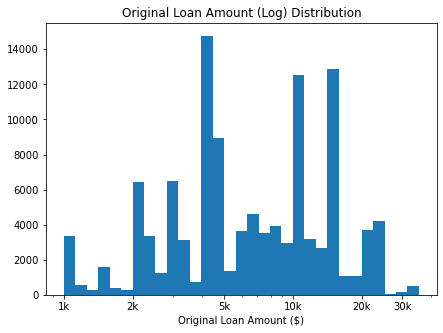

In [24]:
#Histogram to explore the LoanOriginalAmount variable
log_bin = np.log10(my_data1['LoanOriginalAmount'])
bins2 = 10**np.arange(3.0, log_bin.max()+0.05, 0.05)
plt.figure(figsize=[7, 5])
plt.hist(data = my_data1, x = 'LoanOriginalAmount', bins = bins2)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 3e4], ['1k', '2k', '5k', '10k', '20k', '30k'])
plt.xlabel('Original Loan Amount ($)')
plt.title('Original Loan Amount (Log) Distribution')
plt.show()

### (Correlation Between LoanOriginalAmount, BorrowerRate, StatedMonthlyIncome, and CreditScore)
A heat map plotted to show the correlation between LoanOriginalAmount. A positive correlation between LoanOriginal Amount and Stated Monthly Income and Credit Score but a negative correlation between Loan Amount and Borrowers' Interest Rate.

In [25]:
num_var = ['LoanOriginalAmount', 'BorrowerRate', 'StatedMonthlyIncome', 'CreditScore']

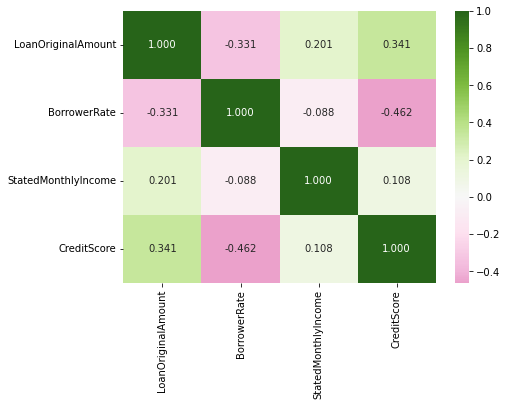

In [28]:
# HeatMap with an annotation of the correlation coefficient of the selected variables
plt.figure(figsize = [7, 5])
sb.heatmap(my_data1[num_var].corr(), annot = True, fmt = '.3f', cmap = 'PiYG', center = 0)
plt.show()

### (Relationship between Loan Original Amount vs VerfiableIncome and LoanTerm)
This visualization shows the relationship between Numberical Original Loan Amount, Borrowers Interest Rate and Categorical(Verifiable Income, LoanTerm) using box plot. A slight positive relationship exist between the categorical variables and Loan Original amount especially for the case of the Loan term. The loan amount tend to be higher with higher loan term. 

In [30]:
cat_var = ['IncomeVerifiable', 'Term']

<Figure size 504x504 with 0 Axes>

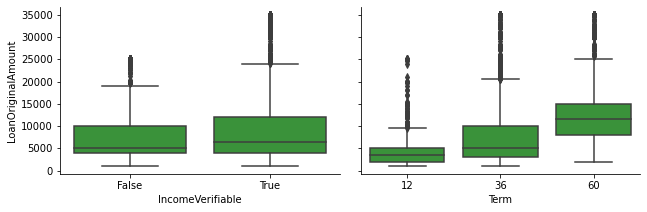

In [31]:
#Boxplot showing relationships
def boxgrid(x, y, **kwargs):
    my_color = sb.color_palette()[2]
    sb.boxplot(x=x, y=y, color=my_color)
    
plt.figure(figsize = [7, 7])
box_plt = sb.PairGrid(data = my_data1, y_vars = 'LoanOriginalAmount', x_vars = cat_var,
                height = 3, aspect = 1.5)
box_plt.map(boxgrid)
plt.show();

### OriginalLoanAmount vs BorrowerRate by Loan Term
A categorical scatterplot to show the relationship between Original Loan Amount and Borrower Rate (Interest Rate) while considering Loan Term.  It is obvious that loan term is associated with interest rate. 12 months term loans recieved the lowest interest rates while 60months loan terms get higher interest rate at increased loan amount. Interestingly, there are some small original loan amount that recieved high interest rate without considering the loan terms.

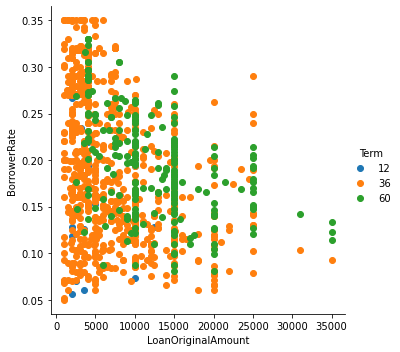

In [32]:
#Select a sample of 1000 for faster rendering and clearer visualization
mydata1_samp2 = my_data1.sample(n=1000, replace = False)
#Scatterplot showing the relationship between BorrowerRate and LoanOriginalAmount while considering Loan Term
mult_plt = sb.FacetGrid(data = mydata1_samp2, hue = 'Term', height=5)
mult_plt.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate')
mult_plt.add_legend()

### OriginalLoanAmount vs StatedMonthlyIncome by Credit Score
A categorical scatterplot to show the relationship between Original Loan Amount and StatedMonthlyIncome while considering Credit Score. It is clear here that credit score has significant influence the loan recieved. In other words, customers with higher credit score and higher monthly income recieved higher loan amount.

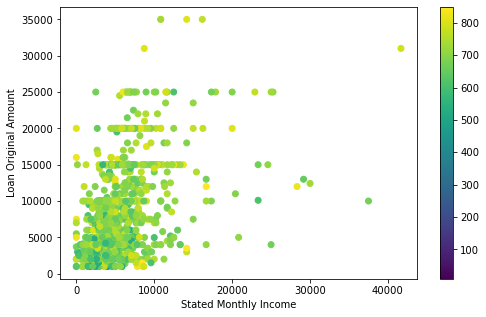

In [34]:
#Scatterplot showing the relationship between LoanOriginalAmount and StatedMonthlyIncome while considering CreditScore
plt.figure(figsize=[8, 5])
plt.scatter(data = mydata1_samp2, y='LoanOriginalAmount', x='StatedMonthlyIncome', c='CreditScore')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Loan Original Amount')
plt.colorbar()

In [ ]:
!jupyter nbconvert DataExploration_slides.ipynb --to slides --post serve --no-input --no-prompt